### 📈 Forecast with Prophet (Facebook's library)

To forecast leads and conversions over the next 3 months, we can use time series forecasting methods such as ARIMA or machine learning-based approaches (e.g., Random Forest or XGBoost), depending on the complexity of the data. The input for these models would include historical lead counts, conversion rates, and other relevant features such as marketing spend or sales activities.

Optimization Recommendations
Budget Allocation: By analyzing which channels are driving high-quality leads, we can recommend optimizing the marketing budget by shifting more focus to the channels with the best ROI.

Campaign Targeting: Segmenting leads based on behavior profiles and enrichment data can help fine-tune targeting strategies for higher conversion rates.

In [24]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import snowflake.connector

In [25]:
# Parámetros de conexión, como los que tienes en el archivo .yml
account = 'rv79164.mexico-central.azure'
user = 'anguiegarcia'
password = 'AnguieCobre_2025'
database = 'my_database'
schema = 'my_schema'
warehouse = 'my_warehouse'
role = 'accountadmin'
threads = 1  # En este caso no es necesario usarlo explícitamente en el conector

# Conexión a Snowflake
conn = snowflake.connector.connect(
    user=user,
    password=password,
    account=account,
    database=database,
    schema=schema,
    warehouse=warehouse,
    role=role
)

In [26]:

sql_query = "SELECT * FROM MART_FORECAST_DATA;"
df = pd.read_sql(sql_query, conn)
print(f"shape: {df.shape}")
df.head()

C:\Users\angugarb\AppData\Local\Temp\ipykernel_28200\72853018.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


shape: (51, 2)


,WEEK_START,LEADS_CREATED
0,2017-06-12,3
1,2017-06-19,1
2,2017-06-26,1
3,2017-07-03,42
4,2017-07-10,51


12:31:09 - cmdstanpy - INFO - Chain [1] start processing
12:31:09 - cmdstanpy - INFO - Chain [1] done processing


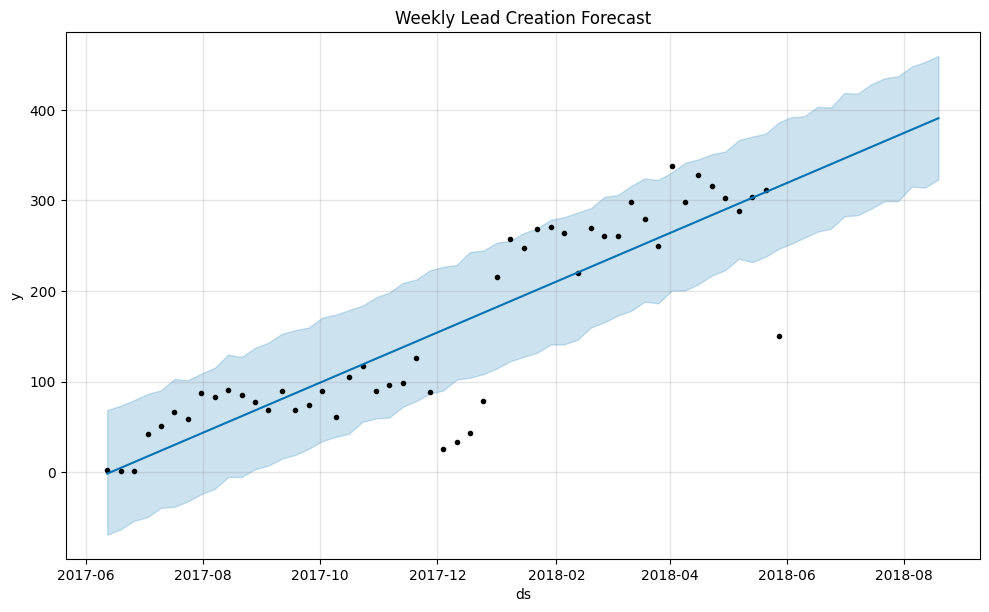

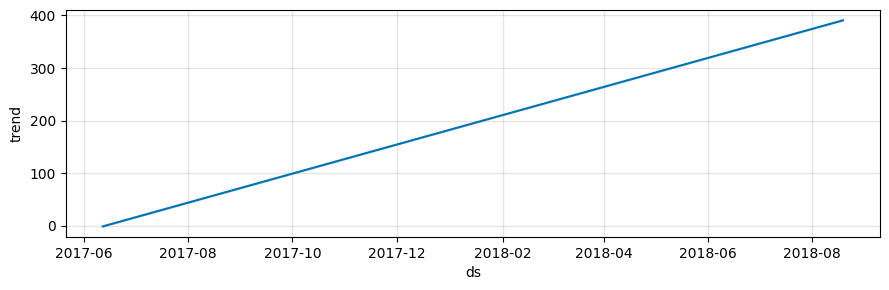

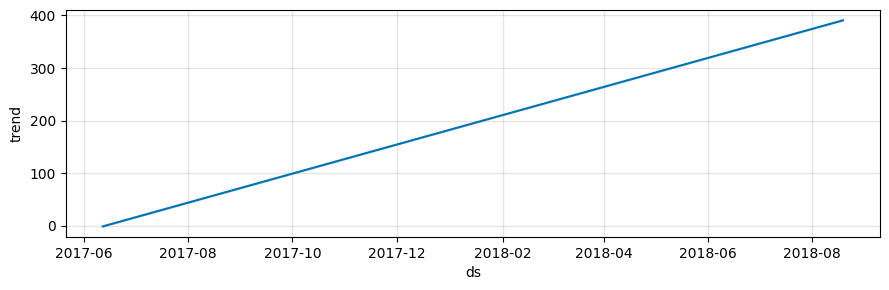

In [27]:
# Load data
df = df.rename(columns={'WEEK_START': 'ds', 'LEADS_CREATED': 'y'})

# Train Prophet model
model = Prophet()
model.fit(df)

# Forecast into the future (e.g., next 12 weeks)
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Weekly Lead Creation Forecast")
plt.show()

# Optional: Plot seasonality
model.plot_components(forecast)


## 🧮 Forecast with ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare time series
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

# Fit ARIMA model (adjust p,d,q as needed)
model = ARIMA(df['y'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 12 steps
forecast = model_fit.forecast(steps=12)
print(forecast)

2018-06-04    155.692000
2018-06-11    156.372732
2018-06-18    156.454144
2018-06-25    156.463881
2018-07-02    156.465045
2018-07-09    156.465184
2018-07-16    156.465201
2018-07-23    156.465203
2018-07-30    156.465203
2018-08-06    156.465203
2018-08-13    156.465203
2018-08-20    156.465203
Freq: W-MON, Name: predicted_mean, dtype: float64


c:\Users\angugarb\Documents\GitHub\Cobre\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\angugarb\Documents\GitHub\Cobre\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\angugarb\Documents\GitHub\Cobre\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
c:\Users\angugarb\Documents\GitHub\Cobre\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\angugarb\Documents\GitHub\Cob